In [1]:
import numpy as np
import torchaudio
import os
import torch
import matplotlib.pyplot as plt

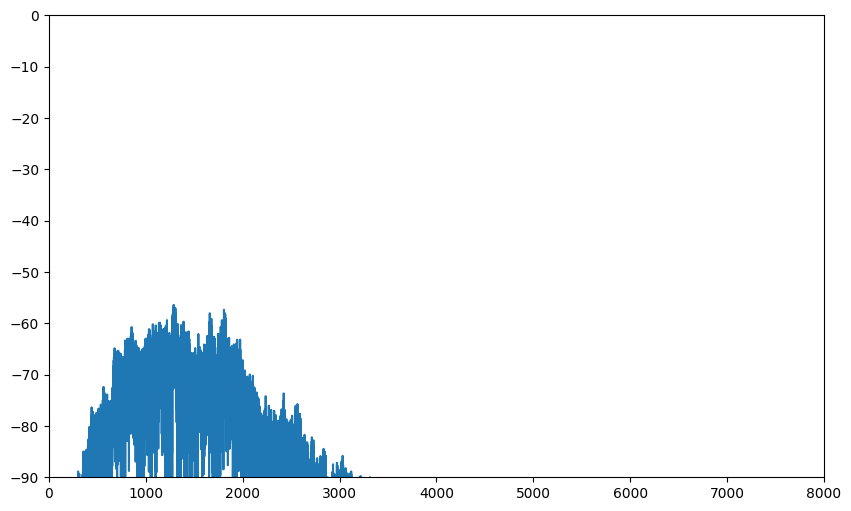

In [3]:
waveform, sample_rate = torchaudio.load('./test/audio/evala_00044.wav')
fft = np.fft.fft(waveform.numpy()[0])
amplitudes = np.abs(fft)

ref_amplitude = 8423.331127865715
amplitudes_dB = 20 * np.log10(amplitudes/ref_amplitude)
freqs = np.fft.fftfreq(len(amplitudes))

freqs_transformed = freqs * sample_rate

# y scale must be log
plt.figure(figsize=(10, 6))
plt.xlim(0, 8000)
plt.ylim(-90, 0)
plt.plot(freqs_transformed, amplitudes_dB)

In [90]:
max(amplitudes) / ( 10 ** (-32.1/20) )

8423.331127865715

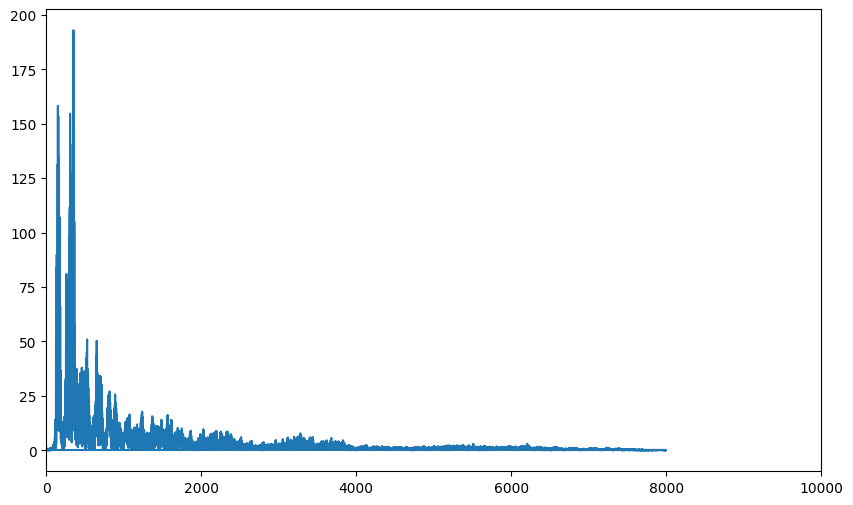

In [ ]:
np.percen

In [18]:
test_set_folder = './test/audio/'

test_set_audio_numbers = np.array([])
min_freqs = np.array([])
max_freqs = np.array([])

for path in tqdm(os.listdir(test_set_folder)):
    audio, sample_rate = librosa.load(os.path.join(test_set_folder, path))
    spectrum = np.abs(librosa.stft(audio))
    freqs = librosa.fft_frequencies(sr=sample_rate, n_fft=spectrum.shape[0])
    test_set_audio_numbers = np.append(test_set_audio_numbers, int(path.split('_')[1][:-4]))
    min_freqs = np.append(min_freqs, np.percentile(freqs))
    max_freqs = np.append(max_freqs, np.max(freqs))

centers = (min_freqs + max_freqs) / 2
widths = max_freqs - min_freqs

min_center_freq = np.min(centers)
max_center_freq = np.max(centers)
min_bandwidth_fraction = np.min(widths) / centers[np.argmin(widths)]

print(f'min_center_freq: {min_center_freq}')
print(f'max_center_freq: {max_center_freq}')
print(f'min_bandwidth_fraction: {min_bandwidth_fraction}')

100%|██████████| 12000/12000 [02:01<00:00, 98.55it/s] 

min_center_freq: 5507.121951219512
max_center_freq: 5507.121951219512
min_bandwidth_fraction: 2.0


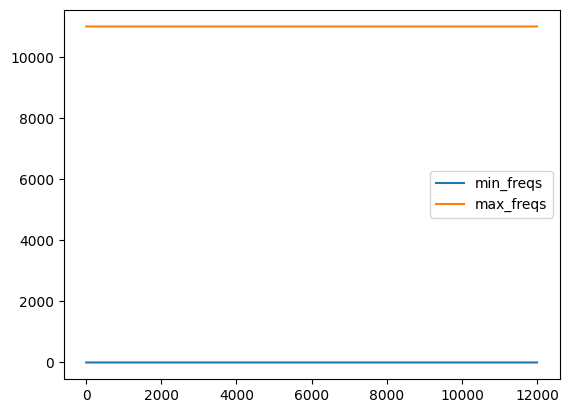

In [17]:
# get the indices that will sort the test_set_audio_nums
sorted_indices = np.argsort(test_set_audio_numbers)

sorted_min_freqs = min_freqs[sorted_indices]
sorted_max_freqs = max_freqs[sorted_indices]

# plot the sorted_min_freqs and sorted_max_freqs as a line chart, with range(12000) as the x-axis
plt.plot(range(12000), sorted_min_freqs, label='min_freqs')
plt.plot(range(12000), sorted_max_freqs, label='max_freqs')
plt.legend()
plt.show()